# DeepLearning






# Partie 1
##- Dynamic Programming

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_values(V , row , colonne):
	# reshape value function
	V_sq = np.reshape(V, (row , colonne))

	# plot the state-value function
	fig = plt.figure(figsize=(10, 10))
	ax = fig.add_subplot(111)
	im = ax.imshow(V_sq, cmap='cool')
	for (j,i),label in np.ndenumerate(V_sq):
	    ax.text(i, j, np.round(label, 5), ha='center', va='center', fontsize=14)
	plt.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
	plt.title('State-Value Function')
	plt.show()

##  Line World

In [ ]:
import numpy as np
import numba
import numpy.random
from more_itertools import take
from tqdm import tqdm

import matplotlib.pyplot as plt


class SingleAgentEnv:
    def state_id(self) -> int:
        pass

    def is_game_over(self) -> bool:
        pass

    def act_with_action_id(self, action_id: int):
        pass

    def score(self) -> float:
        pass

    def available_actions_ids(self) -> np.ndarray:
        pass

    def reset(self):
        pass

    def view(self):
        pass

    def reset_random(self):
        pass


class MDPEnv:
    def states(self) -> np.ndarray:
        pass

    def actions(self) -> np.ndarray:
        pass

    def rewards(self) -> np.ndarray:
        pass

    def is_state_terminal(self, s: int) -> bool:
        pass

    def transition_probability(self, s: int, a: int, s_p: int, r: float) -> float:
        pass

    def view_state(self, s: int):
        pass


class LineWorldMLP(MDPEnv):
    def __init__(self, nb_cells: int = 5):
        self.nb_cells = nb_cells
        self.state = np.arange(nb_cells)
        self.action = np.array([0, 1])
        self.reward = np.array([-1, 0, 1])

        self.probability = np.zeros((len(self.state), len(self.action), len(self.state), len(self.reward)))

        for s in self.state[1:-1]:
            if s == 1:
                self.probability[s, 0, s - 1, 0] = 1.0
            else:
                self.probability[s, 0, s - 1, 1] = 1.0

            if s == nb_cells - 2:
                self.probability[s, 1, s + 1, 2] = 1.0
            else:
                self.probability[s, 1, s + 1, 1] = 1.0

    def states(self) -> np.ndarray:
        return self.state

    def actions(self) -> np.ndarray:
        return self.action

    def rewards(self) -> np.ndarray:
        return self.reward

    def is_state_terminal(self, s: int) -> bool:
        return s == 0 or s == self.nb_cells - 1

    def transition_probability(self, s: int, a: int, s_p: int, r: float) -> float:
        return self.probability[s, a, s_p, r]

    def view_state(self, s: int):
        for i in self.state:
            if i == s:
                print("X", end='')
            else:
                print("_", end='')
        print()


class GridWorldMLP(MDPEnv):
    def __init__(self, rows: int = 5, cols: int = 5):
        self.rows = rows
        self.cols = cols
        self.state = np.arange(rows * cols)
        self.nbcells = rows * cols
        self.action = np.array([0, 1, 2, 3])
        self.reward = np.array([-1.0, 0.0, 1.0])

        self.probability = np.zeros((len(self.state), len(self.action), len(self.state), len(self.reward)))

        def to_s(row, col):
            return ((row * self.cols) + (col + 1)) - 1

        def inc(row, col, a):
            if a == 0:  # left
                col = max(col - 1, 0)
            elif a == 1:  # right
                col = min(col + 1, self.cols - 1)
            elif a == 2:  # up
                row = max(row - 1, 0)
            elif a == 3:  # down
                row = min(row + 1, self.rows - 1)
            return (row, col)

        for row in range(rows):
            for col in range(cols):
                s = to_s(row, col)
                if s in self.state[1:-1]:
                    for a in self.action:
                        r, c = inc(row, col, a)
                        s_p = to_s(r, c)
                        if s != s_p:
                            if (s == 1 and a == 0) or (s == to_s(1, 0) and a == 2):
                                self.probability[s, a, s_p, 0] = 1.0
                            elif (s == self.nbcells - 2 and a == 1) or (s == to_s(rows - 2, cols - 1) and a == 3):
                                self.probability[s, a, s_p, 2] = 1.0
                            else:
                                self.probability[s, a, s_p, 1] = 1.0



    def states(self) -> np.ndarray:
        return self.state

    def actions(self) -> np.ndarray:
        return self.action

    def rewards(self) -> np.ndarray:
        return self.reward

    def is_state_terminal(self, s: int) -> bool:
        return s == 0 or s == self.nb_cells - 1

    def transition_probability(self, s: int, a: int, s_p: int, r: float) -> float:
        return self.probability[s, a, s_p, r]

    def viewstate(self, s: int):
        for i in range(self.rows):
            for j in range(self.cols):
                if s == (((i * self.cols) + (j + 1)) - 1):
                    print("X", end='')
                else:
                    print("", end='')
            print('\n')
        print()




def plot_values(V, row, colonne):
    # reshape value function
    V_sq = np.reshape(V, (row, colonne))

    # plot the state-value function
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    im = ax.imshow(V_sq, cmap='cool')
    for (j, i), label in np.ndenumerate(V_sq):
        ax.text(i, j, np.round(label, 5), ha='center', va='center', fontsize=14)
    plt.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
    plt.title('State-Value Function')
    plt.show()


### Policy Evaluation

policy_evaluation_on_line_world of 7 cells :


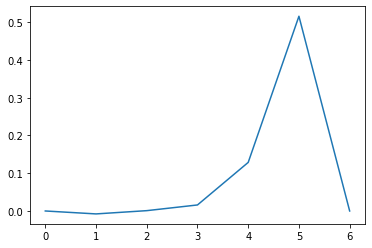

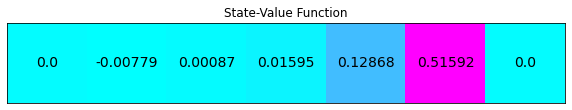

[ 0.         -0.0077857   0.0008665   0.01595072  0.12867812  0.51592392
  0.        ]


In [ ]:

def policy_evaluation_on_line_world(theta: float = 1e-6, gamma: float = 0.99):
    """
    Creates a Line World of 7 cells (leftmost and rightmost are terminal, with -1 and 1 reward respectively)
    Launches a Policy Evaluation Algorithm in order to find the Value Function of a uniform random policy
    Returns the Value function (V(s)) of this policy
    """

    print('policy_evaluation_on_line_world of 7 cells :')

    # Line World of 7 cells
    nb_cells = 7
    env = LineWorldMLP(7)

    # uniform random policy
    policy = np.ones([len(env.states()), len(env.actions())]) / len(env.actions())
    # policy = np.random.random((len(env.states()), len(env.actions())))

    V = np.random.random((len(env.states()),))
    V[0] = 0.0
    V[nb_cells - 1] = 0.0

    while True:
        delta = 0
        for s in env.states():
            v = V[s]
            V[s] = 0.0
            for a in env.actions():
                total = 0.0
                for s_p in env.states():
                    for r in range(len(env.rewards())):
                        total += env.transition_probability(s, a, s_p, r) * (env.rewards()[r] + gamma * V[s_p])
                    total *= policy[s, a]
                V[s] += total
            delta = max(delta, np.abs(v - V[s]))
        if delta < theta:
            break
    # Env.plot_values(V,1,7
    plt.plot(V)
    plt.show()
    plot_values(V ,1 , nb_cells)

    return V


print(policy_evaluation_on_line_world())

###TEST

[[0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]]


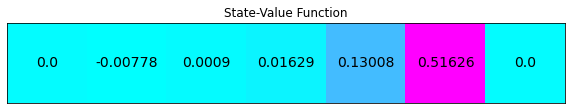

In [ ]:
def policy_evaluation(env, policy, gamma=1, theta=1e-8):
    V = np.zeros(len(env.states()))
    while True:
        delta = 0
        for s in range(len(env.states())):
            Vs = 0
            for a in env.actions():
                total = 0.0
                for s_p in env.states():
                    for r in range(len(env.rewards())):
                        total += env.transition_probability(s, a, s_p, r) * (env.rewards()[r] + gamma * V[s_p])
                    total *= policy[s, a]
                Vs += total
            delta = max(delta, np.abs(V[s] - Vs))

            V[s] = Vs
        if delta < theta:
            break
    return V


nb_cells = 7
env = LineWorldMLP(7)

policy = np.ones([len(env.states()), len(env.actions())]) / len(env.actions())
print(policy)

V = policy_evaluation(env, policy)

plot_values(V , 1, 7)



### Policy Iteration

policy_iteration_on_line_world of 7 cells :


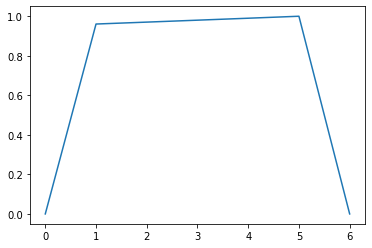

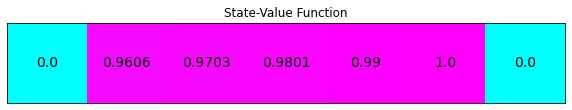

(array([[0.5, 0.5],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.5, 0.5]]), array([0.        , 0.96059601, 0.970299  , 0.9801    , 0.99      ,
       1.        , 0.        ]))


In [ ]:
def policy_iteration_on_line_world(theta: float = 1e-6, gamma: float = 0.99):
    """
    Creates a Line World of 7 cells (leftmost and rightmost are terminal, with -1 and 1 reward respectively)
    Launches a Policy Iteration Algorithm in order to find the Optimal Policy and its Value Function
    Returns the Policy (Pi(s,a)) and its Value Function (V(s))
    """

    print('policy_iteration_on_line_world of 7 cells :')

    # Line World of 7 cells
    nb_cells = 7
    env = LineWorldMLP(7)

    V = np.random.random((len(env.states()),))
    V[0] = 0.0
    V[nb_cells - 1] = 0.0

    # policy
    policy = np.random.random((len(env.states()), len(env.actions())))

    for s in env.states():
        policy[s] /= np.sum(policy[s])

    policy[0] = 0.0
    policy[nb_cells - 1] = 0.0
    # print('Initial policy : ', policy)

    while True:
        # policy evalution
        while True:
            delta = 0
            for s in env.states():
                v = V[s]
                V[s] = 0.0
                for a in env.actions():
                    total = 0.0
                    for s_p in env.states():
                        for r in range(len(env.rewards())):
                            total += env.transition_probability(s, a, s_p, r) * (env.rewards()[r] + gamma * V[s_p])
                        total *= policy[s, a]
                    V[s] += total
                delta = max(delta, np.abs(v - V[s]))
            if delta < theta:
                break

        # policy improvement
        stable = True
        for s in env.states():
            old_policy_s = policy[s].copy()
            q = np.zeros(len(env.actions()))
            for a in env.actions():
                for s_p in env.states():
                    for r in range(len(env.rewards())):
                        q[a] += env.transition_probability(s, a, s_p, r) * (env.rewards()[r] + gamma * V[s_p])
            best_a = np.argwhere(q == np.max(q)).flatten()
            policy[s] = np.sum([np.eye(len(env.actions()))[i] for i in best_a], axis=0) / len(best_a)

            if np.any(policy[s] != old_policy_s):
                stable = False
        if stable:
            plt.plot(V)
            plt.show()
            plot_values(V ,1 , nb_cells)
            return policy, V


print(policy_iteration_on_line_world())

###TEST

In [ ]:
def q_from_v(env, V, s, gamma=1):
    q = np.zeros(len(env.actions()))
    for a in env.actions():
      total = 0.0
      for s_p in env.states():
          for r in range(len(env.rewards())):
              q[a] += env.transition_probability(s, a, s_p, r) * (env.rewards()[r] + gamma * V[s_p])
    return q


def value_iteration(env, gamma=1, theta=1e-8):
    V = np.random.random((len(env.states()),))
    V[0] = 0.0
    V[nb_cells - 1] = 0.0


    # policy
    policy = np.random.random((len(env.states()), len(env.actions())))
    

    for s in env.states():
        policy[s] /= np.sum(policy[s])

    policy[0] = 0.0
    policy[nb_cells - 1] = 0.0

    while True:
        delta = 0
        for s in env.states():
            v = V[s]
            q = np.zeros(len(env.actions()))
            for a in env.actions():
              total = 0.0
              for s_p in env.states():
                  for r in range(len(env.rewards())):
                      q[a] += env.transition_probability(s, a, s_p, r) * (env.rewards()[r] + gamma * V[s_p])

            V[s] = max(q)
            delta = max(delta,abs(V[s]-v))
        if delta < theta:
            break

    # policy improvement
    for s in env.states():
      v = V[s]
      q = np.zeros(len(env.actions()))
      for a in env.actions():
        total = 0.0
        for s_p in env.states():
            for r in range(len(env.rewards())):
                q[a] += env.transition_probability(s, a, s_p, r) * (env.rewards()[r] + gamma * V[s_p])
      best_a = np.argwhere(q==np.max(q)).flatten()
      policy[s] = np.sum([np.eye(len(env.actions()))[i] for i in best_a], axis=0)/len(best_a)
      
    return policy, V    



nb_cells = 7
env = LineWorldMLP(7)
value_iteration(env)

print(value_iteration(env))


(array([[0.5, 0.5],
       [0. , 1. ],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5]]), array([0., 1., 1., 1., 1., 1., 0.]))


In [ ]:
def policy_iteration_on_line_world(theta: float = 1e-6 , gamma: float = 0.99):
    """
    Creates a Line World of 7 cells (leftmost and rightmost are terminal, with -1 and 1 reward respectively)
    Launches a Policy Iteration Algorithm in order to find the Optimal Policy and its Value Function
    Returns the Policy (Pi(s,a)) and its Value Function (V(s))
    """

    print('policy iteration on line world of 7 cells :')

    # Line World of 7 cells
    nb_cells = 7
    env = LineWorldMLP(7)

    V = np.random.random((len(env.states()),))
    V[0] = 0.0
    V[nb_cells - 1] = 0.0

    # policy
    policy = np.random.random((len(env.states()), len(env.actions())))

    for s in env.states():
        policy[s] /= np.sum(policy[s])

    policy[0] = 0.0
    policy[nb_cells - 1] = 0.0
    print('Initial policy : ', policy)


    while True:
        delta = 0
        for s in env.states():
            v = V[s]
            q = np.zeros(len(env.actions()))
            for a in env.actions():
              total = 0.0
              for s_p in env.states():
                  for r in range(len(env.rewards())):
                      q[a] += env.transition_probability(s, a, s_p, r) * (env.rewards()[r] + gamma * V[s_p])

            V[s] = max(q)
            delta = max(delta,abs(V[s]-v))
        if delta < theta:
            break

    for s in env.states():
      v = V[s]
      q = np.zeros(len(env.actions()))
      for a in env.actions():
        total = 0.0
        for s_p in env.states():
            for r in range(len(env.rewards())):
                q[a] += env.transition_probability(s, a, s_p, r) * (env.rewards()[r] + gamma * V[s_p])
      best_a = np.argwhere(q==np.max(q)).flatten()
      print(best_a)
      policy[s] = np.sum([np.eye(len(env.actions()))[i] for i in best_a], axis=0)/len(best_a)
    return policy, V

print(policy_iteration_on_line_world())

policy iteration on line world of 7 cells :
Initial policy :  [[0.         0.        ]
 [0.52838713 0.47161287]
 [0.75669797 0.24330203]
 [0.58181461 0.41818539]
 [0.75238399 0.24761601]
 [0.22983789 0.77016211]
 [0.         0.        ]]
[0 1]
[1]
[1]
[1]
[1]
[1]
[0 1]
(array([[0.5, 0.5],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.5, 0.5]]), array([0.        , 0.96059601, 0.970299  , 0.9801    , 0.99      ,
       1.        , 0.        ]))


### Value Iteration

value_iteration_on_line_world of 7 cells :


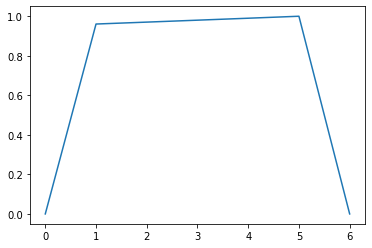

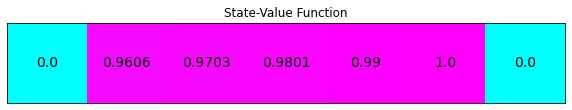

(array([[0.5, 0.5],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.5, 0.5]]), array([0.        , 0.96059601, 0.970299  , 0.9801    , 0.99      ,
       1.        , 0.        ]))


In [ ]:
def value_iteration_on_line_world(theta: float = 1e-6, gamma: float = 0.99):
    """
    Creates a Line World of 7 cells (leftmost and rightmost are terminal, with -1 and 1 reward respectively)
    Launches a Value Iteration Algorithm in order to find the Optimal Policy and its Value Function
    Returns the Policy (Pi(s,a)) and its Value Function (V(s))
    """
    # TODO
    print('value_iteration_on_line_world of 7 cells :')

    # Line World of 7 cells
    nb_cells = 7
    env = LineWorldMLP(7)

    V = np.random.random((len(env.states()),))
    V[0] = 0.0
    V[nb_cells - 1] = 0.0

    # policy
    policy = np.random.random((len(env.states()), len(env.actions())))

    for s in env.states():
        policy[s] /= np.sum(policy[s])

    policy[0] = 0.0
    policy[nb_cells - 1] = 0.0
    # print('Initial policy : ', policy)

    while True:
        delta = 0
        for s in env.states():
            v = V[s]
            q = np.zeros(len(env.actions()))
            for a in env.actions():
                total = 0.0
                for s_p in env.states():
                    for r in range(len(env.rewards())):
                        q[a] += env.transition_probability(s, a, s_p, r) * (env.rewards()[r] + gamma * V[s_p])
            V[s] = max(q)
            delta = max(delta, abs(V[s] - v))
        if delta < theta:
            break

    for s in env.states():
        q = np.zeros(len(env.actions()))
        for a in env.actions():
            total = 0.0
            for s_p in env.states():
                for r in range(len(env.rewards())):
                    q[a] += env.transition_probability(s, a, s_p, r) * (env.rewards()[r] + gamma * V[s_p])
        best_a = np.argwhere(q == np.max(q)).flatten()
        policy[s] = np.sum([np.eye(len(env.actions()))[i] for i in best_a], axis=0) / len(best_a)


    plt.plot(V)
    plt.show()
    plot_values(V ,1 , nb_cells)
    return policy, V

print(value_iteration_on_line_world())

###TEST

In [ ]:
def value_iteration_on_line_world(theta: float = 1e-6 , gamma: float = 0.99):
    """
    Creates a Line World of 7 cells (leftmost and rightmost are terminal, with -1 and 1 reward respectively)
    Launches a Value Iteration Algorithm in order to find the Optimal Policy and its Value Function
    Returns the Policy (Pi(s,a)) and its Value Function (V(s))
    """
    
    # Line World of 7 cells
    nb_cells = 7
    env = LineWorldMLP(7)

    V = np.random.random((len(env.states()),))
    V[0] = 0.0
    V[nb_cells - 1] = 0.0

    # policy
    policy = np.random.random((len(env.states()), len(env.actions())))

    for s in env.states():
        policy[s] /= np.sum(policy[s])

    policy[0] = 0.0
    policy[nb_cells - 1] = 0.0
    print('Initial policy : ', policy)

    while True:
      while True:
          delta = 0
          for s in range(7):
              v = V[s]
              V[s] = max(q_from_v(env, V, s, gamma))
              delta = max(delta,abs(V[s]-v))
          if delta < theta:
              break
    policy = policy_improvement(env, V, gamma)





    pass

## Grid World


### Policy Evaluation

policy_evaluation_on_grid_world of 5x5 cells :


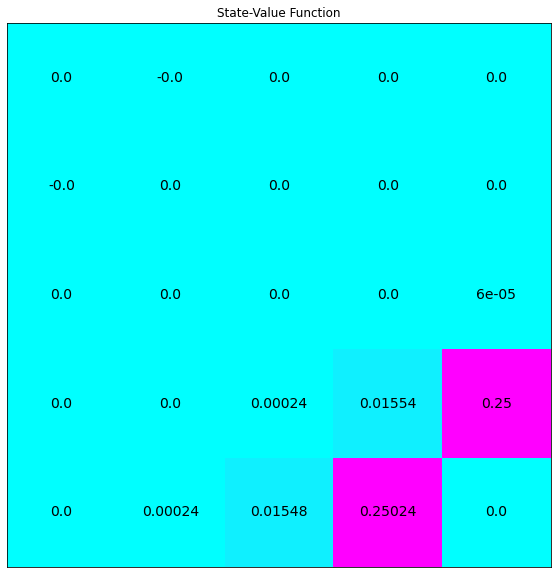

[ 0.00000000e+00 -8.88178420e-16  4.56104270e-26  1.76946746e-24
  3.28750773e-21 -8.88176806e-16  7.66224466e-19  2.99517736e-17
  5.54010665e-14  1.42623857e-11  5.02155285e-14  1.96376127e-12
  3.63094810e-09  9.39260496e-07  6.04250318e-05  5.02716060e-10
  9.29510652e-07  2.40465908e-04  1.55440575e-02  2.50000939e-01
  9.25879760e-07  2.39527557e-04  1.54845588e-02  2.50240466e-01
  0.00000000e+00]


In [ ]:

def policy_evaluation_on_grid_world(theta: float = 1e-6, gamma: float = 0.99):
    """
    Creates a Grid World of 5x5 cells (upper rightmost and lower rightmost are terminal, with -1 and 1 reward respectively)
    Launches a Policy Evaluation Algorithm in order to find the Value Function of a uniform random policy
    Returns the Value function (V(s)) of this policy
    """
    # TODO
    print('policy_evaluation_on_grid_world of 5x5 cells :')

    # Grid World of 5x5
    nb_cells = 5*5
    env = GridWorldMLP(5,5)

    # uniform random policy
    policy = np.ones([len(env.states()), len(env.actions())]) / len(env.actions())
    # policy = np.random.random((len(env.states()), len(env.actions())))

    V = np.random.random((len(env.states()),))
    V[0] = 0.0
    V[nb_cells - 1] = 0.0

    while True:
        delta = 0
        for s in env.states():
            v = V[s]
            V[s] = 0.0
            for a in env.actions():
                total = 0.0
                for s_p in env.states():
                    for r in range(len(env.rewards())):
                        total += env.transition_probability(s, a, s_p, r) * (env.rewards()[r] + gamma * V[s_p])
                    total *= policy[s, a]
                V[s] += total
            delta = max(delta, np.abs(v - V[s]))
        if delta < theta:
            break

    plot_values(V,5,5)
    return V

v = policy_evaluation_on_grid_world()
print(v)


### Policy Iteration

policy_iteration_on_grid_world of 5x5 cells :


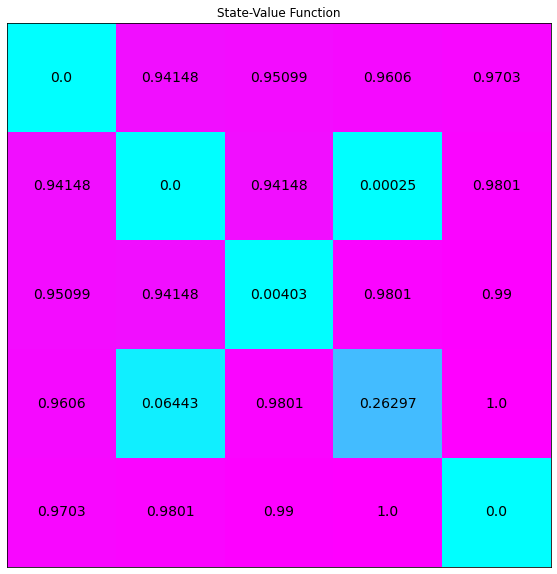

[[0.25 0.25 0.25 0.25]
 [0.   1.   0.   0.  ]
 [0.   1.   0.   0.  ]
 [0.   1.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [0.   0.5  0.   0.5 ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 [0.   0.5  0.   0.5 ]
 [0.   1.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.5  0.   0.5 ]
 [0.   0.   0.   1.  ]
 [0.   0.5  0.   0.5 ]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [0.   1.   0.   0.  ]
 [0.   1.   0.   0.  ]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 0.25]]
[0.00000000e+00 9.41480149e-01 9.50990050e-01 9.60596010e-01
 9.70299000e-01 9.41480149e-01 3.48662835e-09 9.41480149e-01
 2.51694992e-04 9.80100000e-01 9.50990050e-01 9.41480149e-01
 4.02711987e-03 9.80100000e-01 9.90000000e-01 9.60596010e-01
 6.44339180e-02 9.80100000e-01 2.62968750e-01 1.00000000e+00
 9.70299000e-01 9.80100000e-01 9.90000000e-01 1.00000000e+00
 0.00000000e+00]


In [ ]:

def policy_iteration_on_grid_world(theta: float = 1e-6, gamma: float = 0.99):
    """
    Creates a Grid World of 5x5 cells (upper rightmost and lower rightmost are terminal, with -1 and 1 reward respectively)
    Launches a Policy Iteration Algorithm in order to find the Optimal Policy and its Value Function
    Returns the Policy (Pi(s,a)) and its Value Function (V(s))
    """
    # TODO
    print('policy_iteration_on_grid_world of 5x5 cells :')

    # Grid World of 5x5
    nb_cells = 5 * 5
    env = GridWorldMLP(5, 5)

    V = np.random.random((len(env.states()),))
    V[0] = 0.0
    V[nb_cells - 1] = 0.0

    # policy
    policy = np.random.random((len(env.states()), len(env.actions())))

    for s in env.states():
        policy[s] /= np.sum(policy[s])

    policy[0] = 0.0
    policy[nb_cells - 1] = 0.0
    # print('Initial policy : ', policy)

    while True:
        # policy evalution
        while True:
            delta = 0
            for s in env.states():
                v = V[s]
                V[s] = 0.0
                for a in env.actions():
                    total = 0.0
                    for s_p in env.states():
                        for r in range(len(env.rewards())):
                            total += env.transition_probability(s, a, s_p, r) * (env.rewards()[r] + gamma * V[s_p])
                        total *= policy[s, a]
                    V[s] += total
                delta = max(delta, np.abs(v - V[s]))
            if delta < theta:
                break

        # policy improvement
        stable = True
        for s in env.states():
            old_policy_s = policy[s].copy()
            q = np.zeros(len(env.actions()))
            for a in env.actions():
                for s_p in env.states():
                    for r in range(len(env.rewards())):
                        q[a] += env.transition_probability(s, a, s_p, r) * (env.rewards()[r] + gamma * V[s_p])
            best_a = np.argwhere(q == np.max(q)).flatten()
            policy[s] = np.sum([np.eye(len(env.actions()))[i] for i in best_a], axis=0) / len(best_a)

            if np.any(policy[s] != old_policy_s):
                stable = False
        if stable:
            plot_values(V,5,5)
            return policy, V

p,v = policy_iteration_on_grid_world()
print(p)
print(v)




### Value Iteration

value_iteration_on_grid_world of 5x5 cells :


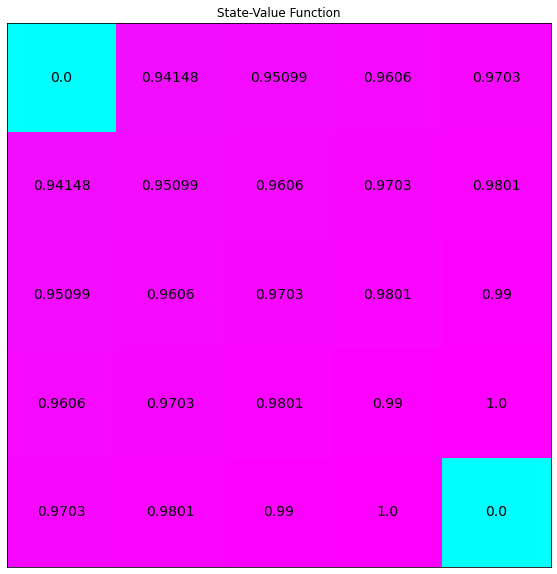

[[0.25 0.25 0.25 0.25]
 [0.   0.5  0.   0.5 ]
 [0.   0.5  0.   0.5 ]
 [0.   0.5  0.   0.5 ]
 [0.   0.   0.   1.  ]
 [0.   0.5  0.   0.5 ]
 [0.   0.5  0.   0.5 ]
 [0.   0.5  0.   0.5 ]
 [0.   0.5  0.   0.5 ]
 [0.   0.   0.   1.  ]
 [0.   0.5  0.   0.5 ]
 [0.   0.5  0.   0.5 ]
 [0.   0.5  0.   0.5 ]
 [0.   0.5  0.   0.5 ]
 [0.   0.   0.   1.  ]
 [0.   0.5  0.   0.5 ]
 [0.   0.5  0.   0.5 ]
 [0.   0.5  0.   0.5 ]
 [0.   0.5  0.   0.5 ]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [0.   1.   0.   0.  ]
 [0.   1.   0.   0.  ]
 [0.   1.   0.   0.  ]
 [0.25 0.25 0.25 0.25]]
[0.         0.94148015 0.95099005 0.96059601 0.970299   0.94148015
 0.95099005 0.96059601 0.970299   0.9801     0.95099005 0.96059601
 0.970299   0.9801     0.99       0.96059601 0.970299   0.9801
 0.99       1.         0.970299   0.9801     0.99       1.
 0.        ]


In [ ]:


def value_iteration_on_grid_world(theta: float = 1e-6, gamma: float = 0.99):
    """
    Creates a Grid World of 5x5 cells (upper rightmost and lower rightmost are terminal, with -1 and 1 reward respectively)
    Launches a Value Iteration Algorithm in order to find the Optimal Policy and its Value Function
    Returns the Policy (Pi(s,a)) and its Value Function (V(s))
    """
    # TODO

    print('value_iteration_on_grid_world of 5x5 cells :')

    # Grid World of 5x5
    nb_cells = 5 * 5
    env = GridWorldMLP(5, 5)

    V = np.random.random((len(env.states()),))
    V[0] = 0.0
    V[nb_cells - 1] = 0.0

    # policy
    policy = np.random.random((len(env.states()), len(env.actions())))

    for s in env.states():
        policy[s] /= np.sum(policy[s])

    policy[0] = 0.0
    policy[nb_cells - 1] = 0.0
    # print('Initial policy : ', policy)

    while True:
        delta = 0
        for s in env.states():
            v = V[s]
            q = np.zeros(len(env.actions()))
            for a in env.actions():
                total = 0.0
                for s_p in env.states():
                    for r in range(len(env.rewards())):
                        q[a] += env.transition_probability(s, a, s_p, r) * (env.rewards()[r] + gamma * V[s_p])
            V[s] = max(q)
            delta = max(delta, abs(V[s] - v))
        if delta < theta:
            break

    for s in env.states():
        q = np.zeros(len(env.actions()))
        for a in env.actions():
            total = 0.0
            for s_p in env.states():
                for r in range(len(env.rewards())):
                    q[a] += env.transition_probability(s, a, s_p, r) * (env.rewards()[r] + gamma * V[s_p])
        best_a = np.argwhere(q == np.max(q)).flatten()
        policy[s] = np.sum([np.eye(len(env.actions()))[i] for i in best_a], axis=0) / len(best_a)
    plot_values(V,5,5)
    return policy, V


p,v = value_iteration_on_grid_world()
print(p)
print(v)


## - Méthodes Monte Carlo

### TicTacToe 1

In [115]:
import numpy as np
import numba
import numpy.random
from more_itertools import take
from tqdm import tqdm
from typing import Optional
import matplotlib.pyplot as plt


class SingleAgentEnv:
    def state_id(self) -> int:
        pass

    def is_game_over(self) -> bool:
        pass

    def act_with_action_id(self, action_id: int):
        pass

    def score(self) -> float:
        pass

    def available_actions_ids(self) -> np.ndarray:
        pass

    def reset(self):
        pass

    def view(self):
        pass

    def reset_random(self):
        pass



class Player:
    def __init__(self, sign: int, type: str) -> None:
        self.sign = sign
        self.is_winner = False
        self.type = type  # 'H':human player, 'R': Random player, 'A'

    def play(self, available_actions, state_id=None, policy=None) -> Optional[int]:
        action_id = None
        if self.type == 'H':
            while action_id not in available_actions :
                print(available_actions)
                action_id = int (input("Please enter your action id IN : "))
                if action_id in available_actions:
                    break
        elif self.type == 'R':
            action_id = np.random.choice(available_actions)
        else:
            if state_id is not None and policy is not None:
                # action_id = max(policy[state_id], key=policy[state_id].get)
                action_id = choices(available_actions, weights=policy)[0]
                if(action_id == None):
                   action_id = np.random.choice(available_actions)
        return action_id


class TicTacToeEnv(SingleAgentEnv):
    def __init__(self, size=3) -> None:
        self.size = size
        self.board = np.zeros((size, size))
        self.actions = np.arange(size * size)
        self.players = np.array([Player(1, 'H'), Player(2, 'A')])
        self.currentplayer = self.players[0]

    def state_id(self) -> int:
        state = 0
        for i in range(self.size):
            for j in range(self.size):
                state += self.board[i][j] * pow(self.size, i * self.size + j)
        return int(state)

    def is_game_over(self) -> bool:
        if len(self.available_actions_ids()) == 0:
            return True
        else:
            # Check diagonals
            if self.board[0][0] == self.board[1][1] == self.board[2][2] and self.board[0][0] != 0:
                if self.players[0].sign == self.board[0][0]:
                    self.players[0].is_winner = True
                else:
                    self.players[1].is_winner = True
                return True
            elif self.board[2][0] == self.board[1][1] == self.board[0][2] and self.board[2][0] != 0:
                if self.players[0].sign == self.board[2][0]:
                    self.players[0].is_winner = True
                else:
                    self.players[1].is_winner = True
                return True
            else:
                for i in range(self.size):
                    # Check horizontals
                    if self.board[i][0] == self.board[i][1] == self.board[i][2] and self.board[i][0] != 0:
                        if self.players[0].sign == self.board[i][0]:
                            self.players[0].is_winner = True
                        else:
                            self.players[1].is_winner = True
                        return True
                    # Check verticals
                    elif self.board[0][i] == self.board[1][i] == self.board[2][i] and self.board[0][i] != 0:
                        if self.players[0].sign == self.board[0][0]:
                            self.players[0].is_winner = True
                        else:
                            self.players[1].is_winner = True
                        return True
        return False

    def act_with_action_id(self, action_id: int):
        print(action_id)
        i = action_id // self.size
        j = action_id % self.size
        self.board[i][j] = self.currentplayer.sign

        if (self.currentplayer == self.players[0]):
            self.currentplayer = self.players[1]
        else:
            self.currentplayer = self.players[0]
        
        print(self.convertStateToBoard(self.state_id()))

    def score(self) -> float:
        score = 0
        if(self.is_game_over()):
          if self.players[1].is_winner:
              score = 10
          elif self.players[0].is_winner == False and self.players[1].is_winner == False:
              score = 0
          else :
              score = -1
          
          self.reset()
        return 0

    def available_actions_ids(self) -> np.ndarray:
        positions = []
        cpt = 0
        for i in range(self.size):
            for j in range(self.size):
                if self.board[i, j] == 0:
                    positions.append(cpt)
                cpt += 1

        return np.array(positions)

    def reset(self):
        self.board = np.zeros((self.size, self.size))
        self.players[0].is_winner = False
        self.players[1].is_winner = False
        self.currentplayer = self.players[0]

    def convertStateToBoard(self, state, b=3):
        if state == 0:
            return np.zeros((self.size, self.size))
        digits = []
        while len(digits) < self.size * self.size:
            digits.append(int(state % b))
            state //= b
        digits = np.array(digits)
        return digits.reshape(self.size, self.size)

    def playWith(self, action):
        self.act_with_action_id(self.currentplayer.sign, action)
        if (self.currentplayer == self.players[0]):
            self.currentplayer = self.players[1]
        else:
            self.currentplayer = self.players[0]

        return self.state_id, self.score(), self.is_game_over()


In [118]:

def monte_carlo_es_on_tic_tac_toe_solo(gamma: float = 0.99, max_episodes: int = 1):

  env = TicTacToeEnv()
  actions = env.available_actions_ids()
  pi = defaultdict(lambda: {a: random() for a in actions})
  Q = defaultdict(lambda: {a: 0.0 for a in actions})
  Returns = defaultdict()

  for ep in range(max_episodes):
      env.reset()
      s0 = env.state_id()
      pis = [pi[s0][a] for a in env.available_actions_ids()]
      a0 = choices(env.available_actions_ids(), weights=pis)[0]
      s = s0
      a = a0

      env.act_with_action_id(env.currentplayer.play(env.available_actions_ids(),env.state_id(), pis))

      s_history = [s0]
      a_history = [a0]
      s_p_history = [env.state_id()]
      r_history = [env.score()]



      while (not env.is_game_over() or env.available_actions_ids() != []):
          s = env.state_id()
          pis = [pi[s][a] for a in env.available_actions_ids()]
          
          if(not env.is_game_over()):
              a = choices(env.available_actions_ids(), weights=pis)[0]
              # faire jouer player[1]
              env.act_with_action_id(env.currentplayer.play(env.available_actions_ids(),env.state_id(), pis))

          s_history.append(s)
          a_history.append(a)
          s_p_history.append(env.state_id())
          r_history.append(env.score())
      
      G = 0
      for t in reversed(range(len(s_history))):
            G = 0.999 * G + r_history[t]
            s_t = s_history[t]
            a_t = a_history[t]
      
            appear = False
            for t_p in range(t - 1):
                if s_history[t_p] == s_t and a_history[t_p] == a_t:
                    appear = True
                    break
            if appear:
                continue

            Returns[s_t][a_t].append(G)
            q[s_t, a_t] = np.mean(Returns[s_t][a_t])
            pi[s_t, :] = 0.0
            pi[s_t, np.argmax(q[s_t])] = 1.0

  return pi, q

print(monte_carlo_es_on_tic_tac_toe_solo())


KeyboardInterrupt: ignored

In [ ]:
from collections import defaultdict
from random import random, choice, choices

def off_policy_monte_carlo_control_on_tic_tac_toe_solo():
    """
    Creates a TicTacToe Solo environment (Single player versus Uniform Random Opponent)
    Launches an Off Policy Monte Carlo Control algorithm in order to find the optimal greedy Policy and its action-value function
    Returns the Optimal Policy (Pi(s,a)) and its Action-Value function (Q(s,a))
    Experiment with different values of hyper parameters and choose the most appropriate combination
    """
    env = TicTacToeEnv()

    actions = env.available_actions_ids()

    Q = defaultdict(lambda: {a: 0.0 for a in actions})
    C = defaultdict(lambda: {a: 0.0 for a in actions})

    pi = defaultdict(lambda: {a: random() for a in actions})
    target_policy = pi
    num_episodes = 20

    for i_episode in range(1, num_episodes + 1):
        env.reset()
        s0 = env.state_id()
        pis = [pi[s0][a] for a in env.available_actions_ids()]
        a0 = choices(env.available_actions_ids(), weights=pis)[0]

        # faire jouer player[1]
        env.act_with_action_id(env.currentplayer.play(env.available_actions_ids(),env.state_id(), pis))

        s_history = [s0]
        a_history = [a0]
        s_p_history = [env.state_id()]
        r_history = [env.score()]

        while (not env.is_game_over() or env.available_actions_ids() != []):
            s = env.state_id()
            pis = [pi[s][a] for a in env.available_actions_ids()]
            
            if(not env.is_game_over()):
              a = choices(env.available_actions_ids(), weights=pis)[0]
              # faire jouer player[1]
              env.act_with_action_id(env.currentplayer.play(env.available_actions_ids(),env.state_id(), pis))

            s_history.append(s)
            a_history.append(a)
            s_p_history.append(env.state_id())
            r_history.append(env.score())

        G = 0.0
        W = 1.0
        delta = 0.999

        for t in range(len(s_p_history))[::-1]:
            state, action, reward = s_p_history[t], a_history[t], r_history[t]
            G = delta * G + reward
            C[state][action] += W
            Q[state][action] += (W / C[state][action]) * (G - Q[state][action])
            target_policy[state] = {a: 0.0 for a in actions}
            best_action = max(Q[state], key=Q[state].get)
            target_policy[state][best_action] = 1.0

            if action != best_action:
                break

            W = W * (target_policy[state][action] / pi[state][action])

    return Q, target_policy

q, p = off_policy_monte_carlo_control_on_tic_tac_toe_solo()

In [ ]:
def sarsa_on_tic_tac_toe_solo( max_iter_count: int = 10000,
               gamma: float = 0.99,
               alpha: float = 0.05,
               epsilon: float = 0.5):
    """
    Creates a TicTacToe Solo environment (Single player versus Uniform Random Opponent)
    Launches a SARSA Algorithm in order to find the optimal epsilon-greedy Policy and its action-value function
    Returns the optimal epsilon-greedy Policy and its Action-Value function (Q(s,a))
    Experiment with different values of hyper parameters and choose the most appropriate combination
    """

    env = TicTacToeEnv()
    q = {}
    for it in range(max_iter_count):

        if env.is_game_over():
            env.reset()

        s = env.state_id()
        aa = env.available_actions_ids()
        if s not in q:
            q[s] = {}
            for a in aa:
                q[s][a] = 0.0 if env.is_game_over() else random.random()

        if random.random() <= epsilon:
            a = np.random.choice(aa)
        else:
            a = aa[np.argmax([q[s][a] for a in aa])]

        old_score = env.score()
        env.act_with_action_id(a)
        new_score = env.score()
        r = new_score - old_score

        if env.is_game_over():
            env.reset()
        s_p = env.state_id()
        aa_p = env.available_actions_ids()

        if s_p not in q:
            q[s_p] = {}
            for a in aa_p:
                q[s_p][a] = 0.0 if env.is_game_over() else random.random()

        predict = q[s][a]
        target = 0.0
        for i in aa_p:
            target = r + gamma * q[s_p][i]
        q[s][a] += alpha * (target - predict)


    pi = {}
    for (s, a_dict) in q.items():
        pi[s] = {}
        actions = []
        q_values = []
        for (a, q_value) in a_dict.items():
            actions.append(a)
            q_values.append(q_value)

        best_action_idx = np.argmax(q_values)
        for i in range(len(actions)):
            pi[s][actions[i]] = 1.0 if actions[i] == best_action_idx else 0.0

    return q, pi

print(sarsa_on_tic_tac_toe_solo)








<function sarsa_on_tic_tac_toe_solo at 0x7fc61caf8830>


In [ ]:
import random

def q_learning_on_tic_tac_toe_solo( max_iter_count: int = 10000,
               gamma: float = 0.99,
               alpha: float = 0.1,
               epsilon: float = 0.2):
    """
    Creates a TicTacToe Solo environment (Single player versus Uniform Random Opponent)
    Launches a Q-Learning algorithm in order to find the optimal greedy Policy and its action-value function
    Returns the optimal greedy Policy and its Action-Value function (Q(s,a))
    Experiment with different values of hyper parameters and choose the most appropriate combination
    """
    q = {}
    env = TicTacToeEnv()

    for it in range(max_iter_count):

        if env.is_game_over():
          env.reset()

        s = env.state_id()
        aa = env.available_actions_ids()
        if s not in q:
            q[s] = {}
            for a in aa:
                q[s][a] = 0.0 if env.is_game_over() else random.random()

        if random.random() <= epsilon:
            a = np.random.choice(aa)
        else:
            a = aa[np.argmax([q[s][a] for a in aa])]

        old_score = env.score()
        env.act_with_action_id(a)
        new_score = env.score()
        r = new_score - old_score

        if env.is_game_over():
            env.reset()

        s_p = env.state_id()
        aa_p = env.available_actions_ids()

        if s_p not in q:
            q[s_p] = {}
            for a in aa_p:
                q[s_p][a] = 0.0 if env.is_game_over() else random.random()

        q[s][a] += alpha * (r + gamma * np.max([q[s_p][a] for a in aa_p]) - q[s][a])

    pi = {}
    for (s, a_dict) in q.items():
        pi[s] = {}
        actions = []
        q_values = []
        for (a, q_value) in a_dict.items():
            actions.append(a)
            q_values.append(q_value)

        best_action_idx = np.argmax(q_values)
        for i in range(len(actions)):
            pi[s][actions[i]] = 1.0 if actions[i] == best_action_idx else 0.0

    return q, pi

print(q_learning_on_tic_tac_toe_solo())

({0: {0: 0.8406262433059187, 1: 0.8408021561484125, 2: 0.839772496159287, 3: 0.8231083020691217, 4: 0.840181883282761, 5: 0.8350517170078205, 6: 0.8301381974474551, 7: 0.8180306602104729, 8: 0.7900650813030157}, 6561: {0: 0.7860771318062529, 1: 0.62857411862863, 2: 0.73940109647461, 3: 0.674569993079379, 4: 0.7304006750932481, 5: 0.583991674510416, 6: 0.7949063861191924, 7: 0.7816300294749334}, 8019: {0: 0.7996856683396834, 1: 0.7594235087355651, 2: 0.5756205639661337, 3: 0.794923313537225, 4: 0.6372246850368907, 5: 0.7879868089743515, 7: 0.7996368638099436}, 8020: {1: 0.02896500692534698, 2: 0.7991757068761622, 3: 0.7775595180030669, 4: 0.587737804349623, 5: 0.6035643734693383, 7: 0.6986238225675206}, 8038: {1: 0.7995099082837748, 3: 0.27900681891070894, 4: 0.29136426552444306, 5: 0.24330074969944807, 7: 0.6419645508951684}, 8281: {1: 0.05228597503691146, 3: 0.1448606534607757, 4: 0.5978990621138487, 7: 0.1104326331436214}, 8046: {0: 0.5242966643044381, 1: 0.5765234173510945, 2: 0.260